# Netflix sub fees analysis
### This notebook is created to analyze the data regarding the monthly sub fees of netflix in all countries
### The datasource is ( https://www.kaggle.com/prasertk/netflix-subscription-price-in-different-countries/version/2?select=netflix+price+in+different+countries.csv# )

In [1]:
#importing libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sas

#### 1) understanding data


In [2]:
#reading the netflix sub
nfx_price_per_cou_df=pd.read_csv("netflix price in different countries.csv")

#reading the netflix sub fee of dec
nfx_fee_dec=pd.read_csv("Netflix subscription fee Dec-2021.csv")

In [3]:
#Analyzing price of netflix in diffrent countries
nfx_price_per_cou_df

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74
...,...,...,...,...,...,...,...
60,Ireland,6486,4515,1971,9.03,14.67,20.32
61,Switzerland,5506,3654,1852,12.88,20.46,26.96
62,Australia,6114,4050,2064,7.84,12.12,16.39
63,Denmark,4558,2978,1580,12.00,15.04,19.60


In [4]:
nfx_price_per_cou_df.describe()

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,5314.415385,3518.953846,1795.461538,8.368462,11.990000,15.612923
std,980.322633,723.010556,327.279748,1.937819,2.863979,4.040672
min,2274.000000,1675.000000,373.000000,1.970000,3.000000,4.020000
25%,4948.000000,3154.000000,1628.000000,7.990000,10.710000,13.540000
50%,5195.000000,3512.000000,1841.000000,8.990000,11.490000,14.450000
75%,5952.000000,3832.000000,1980.000000,9.030000,13.540000,18.060000
max,7325.000000,5234.000000,2387.000000,12.880000,20.460000,26.960000


In [5]:
#it is neccessery to change the columns name. They are not accessible in dottedMethod

nfx_price_per_cou_df=nfx_price_per_cou_df.rename(columns={'Total Library Size': 'Tot_shows',
                                                            'No. of TV Shows': 'Tot_TVShows',
                                                            'No. of Movies': 'Tot_Movies',
                                                            'Cost Per Month - Basic ($)': 'Basic_monthly_cost',
                                                            'Cost Per Month - Standard ($)': 'Std_monthly_cost',
                                                            'Cost Per Month - Premium ($)':'Prem_monthly_cost'})

nfx_price_per_cou_df

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74
...,...,...,...,...,...,...,...
60,Ireland,6486,4515,1971,9.03,14.67,20.32
61,Switzerland,5506,3654,1852,12.88,20.46,26.96
62,Australia,6114,4050,2064,7.84,12.12,16.39
63,Denmark,4558,2978,1580,12.00,15.04,19.60


#### Now the data is saved in a more accessible way

In [6]:
#infos on the rows and adata value
nfx_price_per_cou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             65 non-null     object 
 1   Tot_shows           65 non-null     int64  
 2   Tot_TVShows         65 non-null     int64  
 3   Tot_Movies          65 non-null     int64  
 4   Basic_monthly_cost  65 non-null     float64
 5   Std_monthly_cost    65 non-null     float64
 6   Prem_monthly_cost   65 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.7+ KB


#### First interesting question is what country have the avg cost for a netflix subs



In [7]:
nfx_price_per_cou_df['Avg_cost']=nfx_price_per_cou_df[['Std_monthly_cost','Prem_monthly_cost','Basic_monthly_cost']].mean(axis=1)
nfx_price_per_cou_df

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost
0,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333
1,Austria,5640,3779,1861,9.03,14.67,20.32,14.673333
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,11.286667
4,Chile,4994,3156,1838,7.07,9.91,12.74,9.906667
...,...,...,...,...,...,...,...,...
60,Ireland,6486,4515,1971,9.03,14.67,20.32,14.673333
61,Switzerland,5506,3654,1852,12.88,20.46,26.96,20.100000
62,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667
63,Denmark,4558,2978,1580,12.00,15.04,19.60,15.546667


In [8]:
#MostExpesive

most_avg_exp=nfx_price_per_cou_df.sort_values('Avg_cost',ascending=False).head(10)
most_avg_exp

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost
61,Switzerland,5506,3654,1852,12.88,20.46,26.96,20.100000
23,Liechtenstein,3048,1712,1336,12.88,20.46,26.96,20.100000
63,Denmark,4558,2978,1580,12.00,15.04,19.60,15.546667
45,Belgium,4990,3374,1616,10.16,15.24,20.32,15.240000
11,France,5445,3604,1841,10.16,15.24,20.32,15.240000
20,Israel,5713,3650,2063,10.56,15.05,19.54,15.050000
53,Sweden,4361,2973,1388,10.90,14.20,19.70,14.933333
18,Iceland,6387,4426,1961,9.03,14.67,20.32,14.673333
21,Italy,5183,3545,1638,9.03,14.67,20.32,14.673333
35,San Marino,2310,1937,373,9.03,14.67,20.32,14.673333


In [9]:
#leastExpensive
least_exp=nfx_price_per_cou_df.sort_values('Avg_cost',ascending=False).tail(10)
least_exp

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost
4,Chile,4994,3156,1838,7.07,9.91,12.74,9.906667
37,South Africa,5736,3686,2050,6.26,10.05,12.58,9.630000
31,Philippines,6362,4154,2208,7.35,9.14,10.93,9.140000
30,Peru,4986,3155,1831,6.11,8.56,11.01,8.560000
42,Ukraine,5336,3261,2075,5.64,8.46,11.29,8.463333
59,Brazil,4972,3162,1810,4.61,7.11,9.96,7.226667
5,Colombia,4991,3156,1835,4.31,6.86,9.93,7.033333
0,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333
19,India,5843,3718,2125,2.64,6.61,8.60,5.950000
41,Turkey,4639,2930,1709,1.97,3.00,4.02,2.996667


c:\Users\Wissel\OneDrive\Desktop\Netflix-Price-Analytics\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Least avg netflix cost')

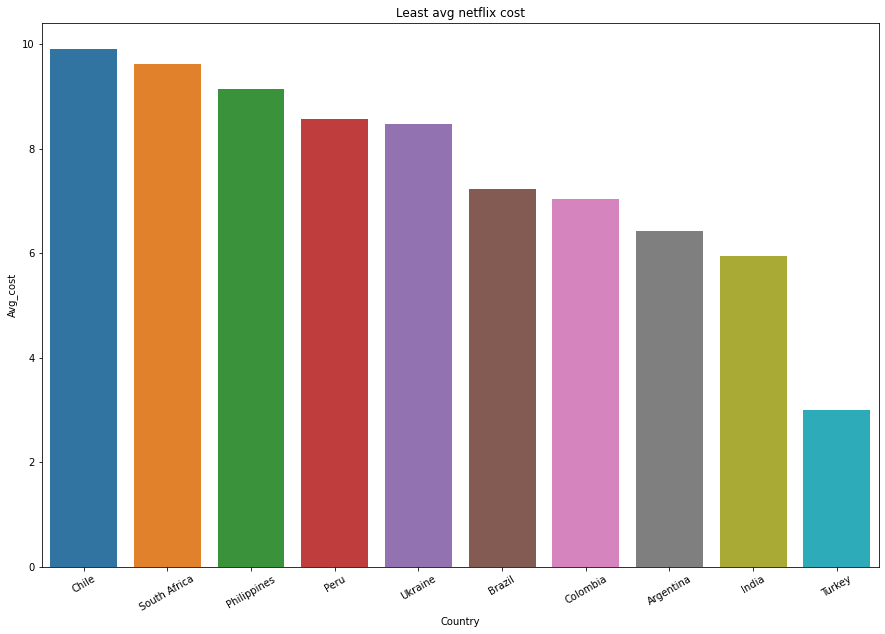

In [10]:
#view of the result
plt.figure(figsize=(15,10))
ax=sas.barplot('Country', 'Avg_cost', data=least_exp)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('Least avg netflix cost')



c:\Users\Wissel\OneDrive\Desktop\Netflix-Price-Analytics\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most avg netflix cost')

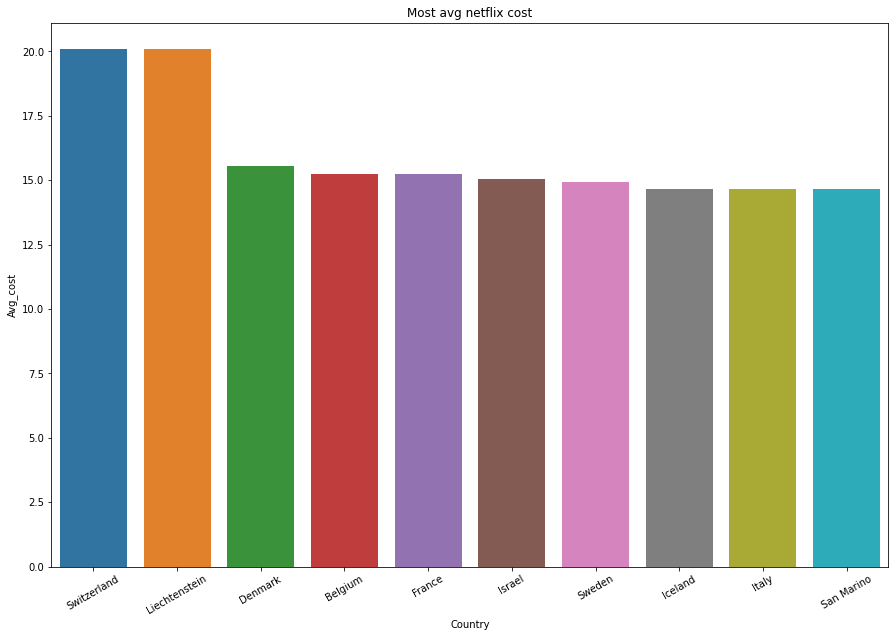

In [11]:
plt.figure(figsize=(15,10))
ax=sas.barplot('Country', 'Avg_cost', data=most_avg_exp)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('Most avg netflix cost')

In [12]:
#avg cost per title (relationship between titles and cost)
nfx_price_per_cou_df

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost
0,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333
1,Austria,5640,3779,1861,9.03,14.67,20.32,14.673333
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,11.286667
4,Chile,4994,3156,1838,7.07,9.91,12.74,9.906667
...,...,...,...,...,...,...,...,...
60,Ireland,6486,4515,1971,9.03,14.67,20.32,14.673333
61,Switzerland,5506,3654,1852,12.88,20.46,26.96,20.100000
62,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667
63,Denmark,4558,2978,1580,12.00,15.04,19.60,15.546667


In [13]:
nfx_price_per_cou_df["Avg_cost_basic_per_title"]=nfx_price_per_cou_df.Basic_monthly_cost/nfx_price_per_cou_df.Tot_shows
nfx_price_per_cou_df["Avg_cost_Std_per_title"]=nfx_price_per_cou_df.Std_monthly_cost/nfx_price_per_cou_df.Tot_shows
nfx_price_per_cou_df["Avg_cost_premium_per_title"]=nfx_price_per_cou_df.Prem_monthly_cost/nfx_price_per_cou_df.Tot_shows
nfx_price_per_cou_df["Avg_cost_per_title"]=nfx_price_per_cou_df.Avg_cost/nfx_price_per_cou_df.Tot_shows

nfx_price_per_cou_df


,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title
0,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333,0.000786,0.001324,0.001945,0.001352
1,Austria,5640,3779,1861,9.03,14.67,20.32,14.673333,0.001601,0.002601,0.003603,0.002602
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,11.286667,0.001329,0.001661,0.001992,0.001661
4,Chile,4994,3156,1838,7.07,9.91,12.74,9.906667,0.001416,0.001984,0.002551,0.001984
...,...,...,...,...,...,...,...,...,...,...,...,...
60,Ireland,6486,4515,1971,9.03,14.67,20.32,14.673333,0.001392,0.002262,0.003133,0.002262
61,Switzerland,5506,3654,1852,12.88,20.46,26.96,20.100000,0.002339,0.003716,0.004896,0.003651
62,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667,0.001282,0.001982,0.002681,0.001982
63,Denmark,4558,2978,1580,12.00,15.04,19.60,15.546667,0.002633,0.003300,0.004300,0.003411


In [14]:
#seeing of the previws infos regarding the avg cost are in line with the cost per title
least_exp_per_title=nfx_price_per_cou_df.sort_values('Avg_cost_per_title').head(10)
least_exp_per_title

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title
41,Turkey,4639,2930,1709,1.97,3.00,4.02,2.996667,0.000425,0.000647,0.000867,0.000646
19,India,5843,3718,2125,2.64,6.61,8.60,5.950000,0.000452,0.001131,0.001472,0.001018
0,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333,0.000786,0.001324,0.001945,0.001352
5,Colombia,4991,3156,1835,4.31,6.86,9.93,7.033333,0.000864,0.001374,0.001990,0.001409
31,Philippines,6362,4154,2208,7.35,9.14,10.93,9.140000,0.001155,0.001437,0.001718,0.001437
59,Brazil,4972,3162,1810,4.61,7.11,9.96,7.226667,0.000927,0.001430,0.002003,0.001453
50,Hungary,6884,4802,2082,7.64,10.71,13.78,10.710000,0.001110,0.001556,0.002002,0.001556
8,Czechia,7325,5234,2091,8.83,11.49,14.15,11.490000,0.001205,0.001569,0.001932,0.001569
42,Ukraine,5336,3261,2075,5.64,8.46,11.29,8.463333,0.001057,0.001585,0.002116,0.001586
36,Slovakia,7035,5055,1980,9.03,11.29,13.54,11.286667,0.001284,0.001605,0.001925,0.001604


c:\Users\Wissel\OneDrive\Desktop\Netflix-Price-Analytics\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Least_cost_per_title')

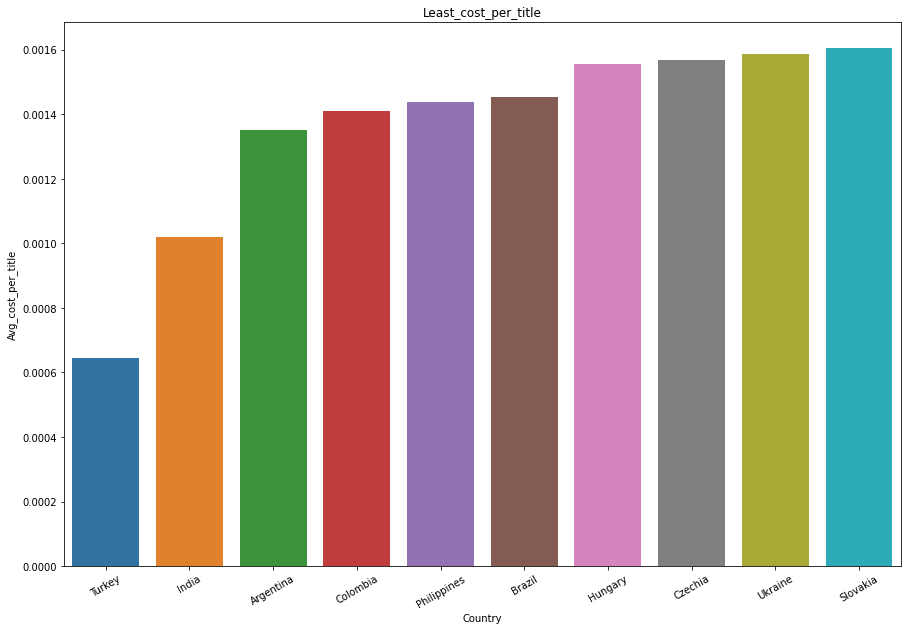

In [15]:
plt.figure(figsize=(15,10))
ax=sas.barplot('Country', 'Avg_cost_per_title', data=least_exp_per_title)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('Least_cost_per_title')

In [22]:
#from the least_exp titles we get only the countries that have a number of total shows greather then the avg of total shows
total_avg_SHOWS=nfx_price_per_cou_df.Tot_shows.mean()
total_avg_SHOWS

5314.415384615385

In [25]:
low_price_high_title=least_exp_per_title[least_exp_per_title.Tot_shows>total_avg_SHOWS]
low_price_high_title

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title
19,India,5843,3718,2125,2.64,6.61,8.60,5.950000,0.000452,0.001131,0.001472,0.001018
31,Philippines,6362,4154,2208,7.35,9.14,10.93,9.140000,0.001155,0.001437,0.001718,0.001437
50,Hungary,6884,4802,2082,7.64,10.71,13.78,10.710000,0.001110,0.001556,0.002002,0.001556
8,Czechia,7325,5234,2091,8.83,11.49,14.15,11.490000,0.001205,0.001569,0.001932,0.001569
42,Ukraine,5336,3261,2075,5.64,8.46,11.29,8.463333,0.001057,0.001585,0.002116,0.001586
36,Slovakia,7035,5055,1980,9.03,11.29,13.54,11.286667,0.001284,0.001605,0.001925,0.001604


In [26]:
low_price_high_title2= least_exp_per_title.merge(least_exp, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
low_price_high_title2

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,_merge
6,Hungary,6884,4802,2082,7.64,10.71,13.78,10.710000,0.001110,0.001556,0.002002,0.001556,left_only
7,Czechia,7325,5234,2091,8.83,11.49,14.15,11.490000,0.001205,0.001569,0.001932,0.001569,left_only
9,Slovakia,7035,5055,1980,9.03,11.29,13.54,11.286667,0.001284,0.001605,0.001925,0.001604,left_only


In [27]:
high_price_low_titles=most_avg_exp[most_avg_exp.Tot_shows<total_avg_SHOWS]
high_price_low_titles

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost
23,Liechtenstein,3048,1712,1336,12.88,20.46,26.96,20.100000
63,Denmark,4558,2978,1580,12.00,15.04,19.60,15.546667
45,Belgium,4990,3374,1616,10.16,15.24,20.32,15.240000
53,Sweden,4361,2973,1388,10.90,14.20,19.70,14.933333
21,Italy,5183,3545,1638,9.03,14.67,20.32,14.673333
35,San Marino,2310,1937,373,9.03,14.67,20.32,14.673333


##### We have found that in some countries it netflix price is convinent relative to the number of titles they offer, in some other countries
##### netflix is not convinent at all (san marino and liechtenstein)
##### This analyis does not take in consideration economics aspects of these countries

### Integrating and considering economic aspects of the previws analysis by retriving data related to countries gdp

In [84]:
from urllib.request import urlretrieve

urlretrieve('https://gist.githubusercontent.com/aakashns/28b2e504b3350afd9bdb157893f9725c/raw/994b65665757f4f8887db1c85986a897abb23d84/countries.csv', 
            'countries.csv')

('countries.csv', <http.client.HTTPMessage at 0x24240780dc0>)

In [30]:
countries_df = pd.read_csv('countries.csv')
countries_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495
...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251


In [85]:
countries_gdp=countries_df[['location','gdp_per_capita']]
countries_gdp

,location,gdp_per_capita
0,Afghanistan,1803.987
1,Albania,11803.431
2,Algeria,13913.839
3,Andorra,NaN
4,Angola,5819.495
...,...,...
205,Vietnam,6171.884
206,Western Sahara,NaN
207,Yemen,1479.147
208,Zambia,3689.251


In [86]:

countries_df.loc[countries_df['location'] == 'Liechtenstein', ['gdp_per_capita']] = 165028
countries_df[countries_df.location=='Liechtenstein']



,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,113
113,Liechtenstein,Europe,38137.0,82.49,2.397,165028.0,NaN


In [87]:
#merging the countries gdp dataframe with the netflix analysis
countries_gdp=countries_gdp.rename(columns={"location":"Country"})
nfx_price_per_cou_df=nfx_price_per_cou_df.merge(countries_gdp,on="Country")
nfx_price_per_cou_df

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita_x,gdp_per_capita_y,gdp_per_capita
0,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333,0.000786,0.001324,0.001945,0.001352,18933.907,18933.907,18933.907
1,Austria,5640,3779,1861,9.03,14.67,20.32,14.673333,0.001601,0.002601,0.003603,0.002602,45436.686,45436.686,45436.686
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202,6885.829,6885.829,6885.829
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,11.286667,0.001329,0.001661,0.001992,0.001661,18563.307,18563.307,18563.307
4,Chile,4994,3156,1838,7.07,9.91,12.74,9.906667,0.001416,0.001984,0.002551,0.001984,22767.037,22767.037,22767.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Ireland,6486,4515,1971,9.03,14.67,20.32,14.673333,0.001392,0.002262,0.003133,0.002262,67335.293,67335.293,67335.293
60,Switzerland,5506,3654,1852,12.88,20.46,26.96,20.100000,0.002339,0.003716,0.004896,0.003651,57410.166,57410.166,57410.166
61,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667,0.001282,0.001982,0.002681,0.001982,44648.710,44648.710,44648.710
62,Denmark,4558,2978,1580,12.00,15.04,19.60,15.546667,0.002633,0.003300,0.004300,0.003411,46682.515,46682.515,46682.515


In [88]:
top_rich_countries=nfx_price_per_cou_df.sort_values('gdp_per_capita',ascending=False).head(20)
top_rich_countries

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita_x,gdp_per_capita_y,gdp_per_capita
22,Liechtenstein,3048,1712,1336,12.88,20.46,26.96,20.100000,0.004226,0.006713,0.008845,0.006594,NaN,165028.000,165028.000
45,Singapore,6303,4109,2194,9.51,12.81,16.11,12.810000,0.001509,0.002032,0.002556,0.002032,85535.383,85535.383,85535.383
59,Ireland,6486,4515,1971,9.03,14.67,20.32,14.673333,0.001392,0.002262,0.003133,0.002262,67335.293,67335.293,67335.293
27,Norway,4528,2955,1573,9.94,12.17,17.75,13.286667,0.002195,0.002688,0.003920,0.002934,64800.057,64800.057,64800.057
60,Switzerland,5506,3654,1852,12.88,20.46,26.96,20.100000,0.002339,0.003716,0.004896,0.003651,57410.166,57410.166,57410.166
34,San Marino,2310,1937,373,9.03,14.67,20.32,14.673333,0.003909,0.006351,0.008797,0.006352,56861.470,56861.470,56861.470
16,Hong Kong,4746,2883,1863,8.08,10.00,11.93,10.003333,0.001702,0.002107,0.002514,0.002108,56054.920,56054.920,56054.920
63,United States,5818,3826,1992,8.99,13.99,17.99,13.656667,0.001545,0.002405,0.003092,0.002347,54225.446,54225.446,54225.446
51,Netherlands,5376,3779,1597,9.03,13.54,18.06,13.543333,0.001680,0.002519,0.003359,0.002519,48472.545,48472.545,48472.545
52,Sweden,4361,2973,1388,10.90,14.20,19.70,14.933333,0.002499,0.003256,0.004517,0.003424,46949.283,46949.283,46949.283


In [89]:
#least convienet palces to have netflix
least_convinent= high_price_low_titles.merge(top_rich_countries, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
least_convinent=least_convinent.merge(nfx_price_per_cou_df, on='Country')
least_convinent



,Country,Tot_shows_x,Tot_TVShows_x,Tot_Movies_x,Basic_monthly_cost_x,Std_monthly_cost_x,Prem_monthly_cost_x,Avg_cost_x,Avg_cost_basic_per_title_x,Avg_cost_Std_per_title_x,...,Std_monthly_cost_y,Prem_monthly_cost_y,Avg_cost_y,Avg_cost_basic_per_title_y,Avg_cost_Std_per_title_y,Avg_cost_premium_per_title_y,Avg_cost_per_title_y,gdp_per_capita_x_y,gdp_per_capita_y_y,gdp_per_capita_y
0,Italy,5183,3545,1638,9.03,14.67,20.32,14.673333,NaN,NaN,...,14.67,20.32,14.673333,0.001742,0.00283,0.003921,0.002831,35220.084,35220.084,35220.084


In [95]:
#no country is convient
most_convinent= low_price_high_title.merge(top_rich_countries, on="Country")
most_convinent=most_convinent.merge(nfx_price_per_cou_df, on='Country')
most_convinent



,Tot_shows_x,Tot_TVShows_x,Tot_Movies_x,Basic_monthly_cost_x,Std_monthly_cost_x,Prem_monthly_cost_x,Avg_cost_x,Avg_cost_basic_per_title_x,Avg_cost_Std_per_title_x,Avg_cost_premium_per_title_x,...,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita_x_y,gdp_per_capita_y_y,gdp_per_capita_y


In [99]:
avg_gdp=nfx_price_per_cou_df.gdp_per_capita.mean()
low_price_high_title=low_price_high_title.merge(nfx_price_per_cou_df,on="Country")
low_price_high_title


C:\Users\Wissel\AppData\Local\Temp\ipykernel_16700\2079684352.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Basic_monthly_cost_x', 'gdp_per_capita_x_x', 'Tot_TVShows_x', 'Avg_cost_x', 'Std_monthly_cost_x', 'Tot_Movies_x', 'Avg_cost_per_title_x', 'Avg_cost_Std_per_title_x', 'gdp_per_capita_y_x', 'Avg_cost_basic_per_title_x', 'Tot_shows_x', 'Prem_monthly_cost_x', 'Avg_cost_premium_per_title_x'} in the result is deprecated and will raise a MergeError in a future version.
  low_price_high_title=low_price_high_title.merge(nfx_price_per_cou_df,on="Country")


,Country,Tot_shows_x,Tot_TVShows_x,Tot_Movies_x,Basic_monthly_cost_x,Std_monthly_cost_x,Prem_monthly_cost_x,Avg_cost_x,Avg_cost_basic_per_title_x,Avg_cost_Std_per_title_x,...,Std_monthly_cost_y,Prem_monthly_cost_y,Avg_cost_y,Avg_cost_basic_per_title_y,Avg_cost_Std_per_title_y,Avg_cost_premium_per_title_y,Avg_cost_per_title_y,gdp_per_capita_x_y,gdp_per_capita_y_y,gdp_per_capita
0,India,5843,3718,2125,2.64,6.61,8.60,5.950000,0.000452,0.001131,...,6.61,8.60,5.950000,0.000452,0.001131,0.001472,0.001018,6426.674,6426.674,6426.674
1,Philippines,6362,4154,2208,7.35,9.14,10.93,9.140000,0.001155,0.001437,...,9.14,10.93,9.140000,0.001155,0.001437,0.001718,0.001437,7599.188,7599.188,7599.188
2,Hungary,6884,4802,2082,7.64,10.71,13.78,10.710000,0.001110,0.001556,...,10.71,13.78,10.710000,0.001110,0.001556,0.002002,0.001556,26777.561,26777.561,26777.561
3,Ukraine,5336,3261,2075,5.64,8.46,11.29,8.463333,0.001057,0.001585,...,8.46,11.29,8.463333,0.001057,0.001585,0.002116,0.001586,7894.393,7894.393,7894.393
4,Slovakia,7035,5055,1980,9.03,11.29,13.54,11.286667,0.001284,0.001605,...,11.29,13.54,11.286667,0.001284,0.001605,0.001925,0.001604,30155.152,30155.152,30155.152


In [101]:
#No results here
most_convinent=low_price_high_title[low_price_high_title.gdp_per_capita>avg_gdp]
most_convinent

,Country,Tot_shows_x,Tot_TVShows_x,Tot_Movies_x,Basic_monthly_cost_x,Std_monthly_cost_x,Prem_monthly_cost_x,Avg_cost_x,Avg_cost_basic_per_title_x,Avg_cost_Std_per_title_x,...,Std_monthly_cost_y,Prem_monthly_cost_y,Avg_cost_y,Avg_cost_basic_per_title_y,Avg_cost_Std_per_title_y,Avg_cost_premium_per_title_y,Avg_cost_per_title_y,gdp_per_capita_x_y,gdp_per_capita_y_y,gdp_per_capita


In [118]:
most_convinent2=low_price_high_title[low_price_high_title.gdp_per_capita==low_price_high_title.gdp_per_capita.max()]
most_convinent2=most_convinent2.drop(columns=['gdp_per_capita_x_y','gdp_per_capita_y_y'])
most_convinent2

,Country,Tot_shows_x,Tot_TVShows_x,Tot_Movies_x,Basic_monthly_cost_x,Std_monthly_cost_x,Prem_monthly_cost_x,Avg_cost_x,Avg_cost_basic_per_title_x,Avg_cost_Std_per_title_x,...,Tot_Movies_y,Basic_monthly_cost_y,Std_monthly_cost_y,Prem_monthly_cost_y,Avg_cost_y,Avg_cost_basic_per_title_y,Avg_cost_Std_per_title_y,Avg_cost_premium_per_title_y,Avg_cost_per_title_y,gdp_per_capita
4,Slovakia,7035,5055,1980,9.03,11.29,13.54,11.286667,0.001284,0.001605,...,1980,9.03,11.29,13.54,11.286667,0.001284,0.001605,0.001925,0.001604,30155.152


In [119]:
least_convinent=least_convinent.drop(columns=['gdp_per_capita_x_y','gdp_per_capita_y_y'])
least_convinent

,Country,Tot_shows_x,Tot_TVShows_x,Tot_Movies_x,Basic_monthly_cost_x,Std_monthly_cost_x,Prem_monthly_cost_x,Avg_cost_x,Avg_cost_basic_per_title_x,Avg_cost_Std_per_title_x,...,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita
0,Italy,5183,3545,1638,9.03,14.67,20.32,14.673333,NaN,NaN,...,1638,9.03,14.67,20.32,14.673333,0.001742,0.00283,0.003921,0.002831,35220.084


In [127]:
moast_and_least=nfx_price_per_cou_df[(nfx_price_per_cou_df.Country=="Italy") | (nfx_price_per_cou_df.Country=="Slovakia")]
moast_and_least

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita_x,gdp_per_capita_y,gdp_per_capita
20,Italy,5183,3545,1638,9.03,14.67,20.32,14.673333,0.001742,0.002830,0.003921,0.002831,35220.084,35220.084,35220.084
35,Slovakia,7035,5055,1980,9.03,11.29,13.54,11.286667,0.001284,0.001605,0.001925,0.001604,30155.152,30155.152,30155.152
